In [ ]:
import ee
import geemap
import xarray as xr
!pip install xee
import xee

In [ ]:
ee.Authenticate()
ee.Initialize(project="losses-from-nature-effects", opt_url='https://earthengine-highvolume.googleapis.com')

In [ ]:
map = geemap.Map(basemap="SATELLITE")
map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
roi=map.draw_last_feature.geometry()
roi

AttributeError: type object 'map' has no attribute 'draw_last_feature'

In [ ]:
ndvi = ee.ImageCollection("NOAA/CDR/VIIRS/NDVI/V1").select("NDVI", 'QA').filterDate('2021','2022')
ndvi

In [ ]:
def cloud_mask(img):
  ndvi_img = img.select('NDVI').multiply(0.0001)
  qa_img = img.select('QA')
  cloud = qa_img.bitwiseAnd(1 << 1).neq(0)
  shadow = qa_img.bitwiseAnd(1 << 2).neq(0)
  mask = cloud.Or(shadow).Not()
  return ndvi_img.updateMask(mask).copyProperties(img, img.propertyNames())

ndvi_mask = ndvi.map(cloud_mask)
ndvi_mask

In [ ]:
ds = xr.open_dataset(ndvi_mask, engine = 'ee', crs = 'EPSG:4326', scale = 0.1, geometry = roi)

ds


<xarray.Dataset> Size: 772MB
Dimensions:  (time: 365, lon: 1023, lat: 517)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
  * lon      (lon) float64 8kB -144.4 -144.3 -144.2 ... -42.44 -42.34 -42.24
  * lat      (lat) float64 4kB 8.109 8.209 8.309 8.409 ... 59.51 59.61 59.71
Data variables:
    NDVI     (time, lon, lat) float32 772MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:

monthly = ds.resample(time = 'M').mean('time')

monthly

<xarray.Dataset> Size: 25MB
Dimensions:  (time: 12, lon: 1023, lat: 517)
Coordinates:
  * lon      (lon) float64 8kB -144.4 -144.3 -144.2 ... -42.44 -42.34 -42.24
  * lat      (lat) float64 4kB 8.109 8.209 8.309 8.409 ... 59.51 59.61 59.71
  * time     (time) datetime64[ns] 96B 2021-01-31 2021-02-28 ... 2021-12-31
Data variables:
    NDVI     (time, lon, lat) float32 25MB nan nan nan nan ... nan nan nan nan
Attributes:
    crs:      EPSG:4326

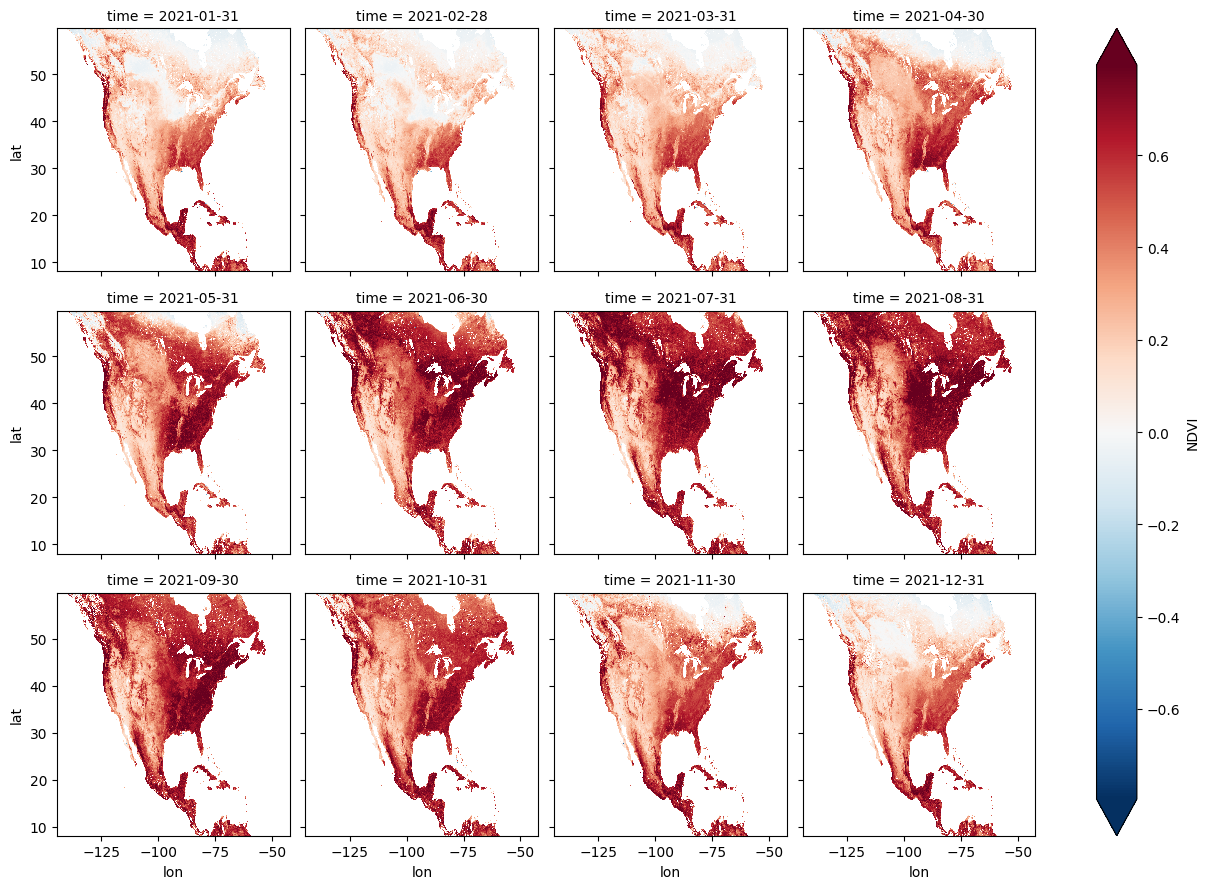

In [ ]:
monthly.NDVI.plot(x= 'lon', y = 'lat',col = 'time', col_wrap = 4, robust= True)

In [ ]:
!pip install netCDF4
import netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.9 MB/s eta 0:00:00


In [ ]:
ds.to_netcdf('ndvi_daily.nc')

!pip install dea_tools

import dea_tools.temporal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.1/543.1 kB 17.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.6/166.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 97.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.5/409.5 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import dea_tools.temporal

!pip install netCDF4
import netCDF4

import xarray as xr

ds = xr.open_dataset('ndvi_daily.nc')

ds

<xarray.Dataset> Size: 772MB
Dimensions:  (time: 365, lon: 1023, lat: 517)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2021-01-01 2021-01-02 ... 2021-12-31
  * lon      (lon) float64 8kB -144.4 -144.3 -144.2 ... -42.44 -42.34 -42.24
  * lat      (lat) float64 4kB 8.109 8.209 8.309 8.409 ... 59.51 59.61 59.71
Data variables:
    NDVI     (time, lon, lat) float32 772MB ...
Attributes:
    crs:      EPSG:4326

In [ ]:
phenology = dea_tools.temporal.xr_phenology(
    ds.NDVI,
    stats=['SOS', 'POS', 'EOS', 'Trough', 'vSOS', 'vPOS', 'vEOS', 'LOS', 'AOS', 'ROG', 'ROS'], method_sos='first', method_eos='last', verbose=True
)

      Phenology...
         POS
         EOS
         Trough
         vSOS
         vPOS
         vEOS
         LOS
         AOS
         ROG
         ROS


In [ ]:
phenology

<xarray.Dataset> Size: 19MB
Dimensions:      (lon: 1023, lat: 517)
Coordinates:
  * lon          (lon) float64 8kB -144.4 -144.3 -144.2 ... -42.44 -42.34 -42.24
  * lat          (lat) float64 4kB 8.109 8.209 8.309 8.409 ... 59.51 59.61 59.71
    spatial_ref  int32 4B 4326
Data variables:
    SOS          (lon, lat) int16 1MB 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    POS          (lon, lat) int16 1MB 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    EOS          (lon, lat) int16 1MB 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2
    Trough       (lon, lat) float32 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    vSOS         (lon, lat) float32 2MB nan nan nan nan nan ... nan nan nan nan
    vPOS         (lon, lat) float32 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    vEOS         (lon, lat) float32 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    LOS          (lon, lat) int16 1MB 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    AOS          (lon, lat) float32 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ROG          (lon, lat) float32 2MB nan nan nan nan nan ... nan nan nan nan
    ROS          (lon, lat) float32 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    grid_mapping:  spatial_ref

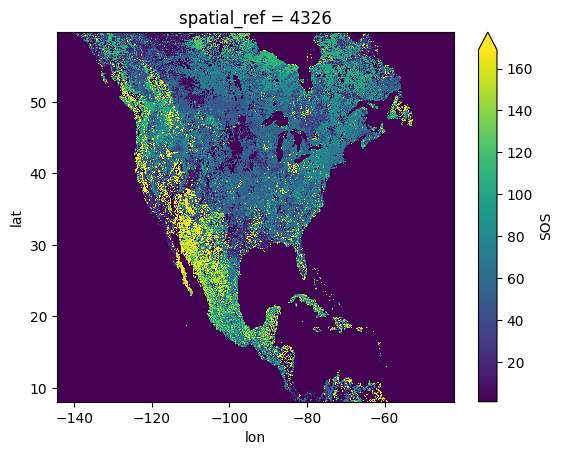

In [ ]:

phenology.SOS.plot(x = 'lon', y = 'lat', robust = True)

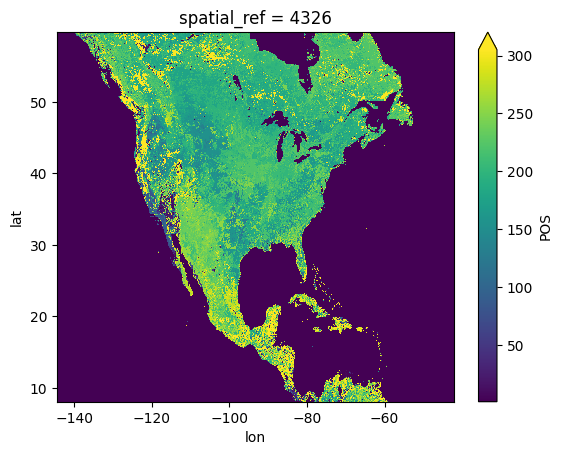

In [ ]:
phenology.POS.plot(x = 'lon', y = 'lat', robust = True)